In [1]:
from vae import VariationalAutoencoder, train_vae_gen, collapse, device, train_dataloader, train_dataset
import torch
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

In [2]:
vae_init = VariationalAutoencoder().to(device)
train_vae_gen(vae_init, train_dataloader, False, None, debug=True)

Number of parameters: 647081
Training ...
Epoch [1 / 30] average reconstruction error: 43933.400054
Epoch [2 / 30] average reconstruction error: 29691.966423
Epoch [3 / 30] average reconstruction error: 28207.063664
Epoch [4 / 30] average reconstruction error: 27525.240401
Epoch [5 / 30] average reconstruction error: 27143.951172
Epoch [6 / 30] average reconstruction error: 26878.175208
Epoch [7 / 30] average reconstruction error: 26683.358124
Epoch [8 / 30] average reconstruction error: 26526.000274
Epoch [9 / 30] average reconstruction error: 26403.594240
Epoch [10 / 30] average reconstruction error: 26303.814503
Epoch [11 / 30] average reconstruction error: 26188.178624
Epoch [12 / 30] average reconstruction error: 26107.419049
Epoch [13 / 30] average reconstruction error: 26018.916356
Epoch [14 / 30] average reconstruction error: 25957.492063
Epoch [15 / 30] average reconstruction error: 25876.042616
Epoch [16 / 30] average reconstruction error: 25814.078113
Epoch [17 / 30] average

In [10]:
samples = []
loss = []
collapse(vae_init, vae_init, samples, loss, syn_ratio=0.99, debug=True)

Generation 1
Generation 2
Generation 3
Generation 4
Generation 5
Generation 6
Generation 7
Generation 8
Generation 9
Generation 10
Generation 11
Generation 12
Generation 13
Generation 14
Generation 15
Generation 16
Generation 17
Generation 18
Generation 19
Generation 20


In [11]:
def to_img(x):
    x = x.clamp(0, 1)
    return x

def show_image(img):
    img = to_img(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

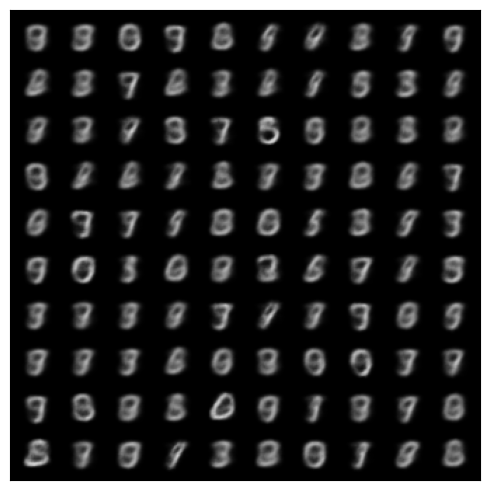

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
show_image(make_grid(samples[19],10,5))
# plt.show()
plt.xticks([])
plt.yticks([])

plt.tight_layout()
# plt.savefig('images/gen10_collapse.png')

In [ ]:
import time
import sys
from vae import VariationalAutoencoder, train_vae_gen, NoisyLatentVariationalAutoencoder, collapse_and_save, train_dataloader, device
from vae_init import init_path
import torch
import os

In [1]:
import time

In [2]:
import sys

In [3]:
import os

In [2]:
import torch

In [1]:
from vae_init import init_path

In [6]:
from vae import VariationalAutoencoder, train_vae_gen, NoisyLatentVariationalAutoencoder, collapse_and_save, train_dataloader, device

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
from torchvision.transforms import ToTensor
import copy

batch_size = 256

In [2]:
train_dataset = datasets.MNIST(root='./data', train = True, download = True, transform = ToTensor())
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(root='./data', train = False, download = True, transform = ToTensor())
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)